<img src="images/1.png">

<img src="images/2.png">

<img src="images/3.png">

<img src="images/4.png">

<img src="images/5.png">

<img src="images/6.png">

<img src="images/7.png">

<img src="images/8.png">

<img src="images/9.png">

<img src="images/10.png">

<img src="images/11.png">

In [1]:
from sklearn import datasets, metrics
import tensorflow as tf
import numpy as np
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Data set of IRIS
iris = datasets.load_iris()

# Load datasets and split them for training and testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [3]:
####### TENSORFLOW #####

# Here is tensorflow's syntax for defining features.
# We must specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)


In [4]:
feature_columns

[_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)]

In [5]:
optimizer

In [6]:
# Build a linear classifier (logistic regression)
# note we have to tell tensorfow the number of classes we are looking for
classifier = tf.contrib.learn.LinearClassifier(feature_columns=feature_columns,
                                               optimizer=optimizer,
                                            n_classes=3)


Explicitly set `enable_centered_bias` to 'True' if you want to keep existing behaviour.


In [7]:
# Fit model. Uses error optimization techniques like stochastic gradient descent
classifier.fit(x=X_train,
               y=y_train,
               steps=1000)  # number of iterations


Estimator(params={'enable_centered_bias': True, 'weight_column_name': None, 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x1136ee190>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)], 'n_classes': 3, 'joint_weights': False, 'gradient_clip_norm': None, 'num_ps_replicas': 0})

In [8]:
# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=X_test,
                                     y=y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 0.947368


In [9]:
# Classify two new flower samples.
new_samples = np.array(
    [[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float)
y = classifier.predict(new_samples)
print('Predictions: {}'.format(str(y)))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Predictions: [1 2]


In [3]:
classifier.__dict__

{'_estimator': Estimator(params={'enable_centered_bias': True, 'weight_column_name': None, 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x113623710>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)], 'n_classes': 3, 'joint_weights': False, 'gradient_clip_norm': None, 'num_ps_replicas': 0}),
 '_feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)],
 '_model_dir': '/var/folders/5m/23l3y1w92r9fyzp935vxsfkm0000gn/T/tmpQyPDBq',
 '_n_classes': 3,
 '_optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer at 0x113623710>,
 '_weight_column_name': None}

In [4]:
# Make a Deep Neural Network (DNN)

In [11]:
# Data sets
iris = datasets.load_iris()

# Load datasets.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)


In [10]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)

In [13]:
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            optimizer=optimizer,
                                            enable_centered_bias=True,
                                            n_classes=3)

In [14]:
# Fit model.
classifier.fit(x=X_train,
               y=y_train,
               steps=2000)

Estimator(params={'enable_centered_bias': True, 'activation_fn': <function relu at 0x10c2aded8>, 'weight_column_name': None, 'hidden_units': [10, 20, 10], 'feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)], 'n_classes': 3, 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x11dee7750>, 'dropout': None, 'gradient_clip_norm': None, 'num_ps_replicas': 0})

In [15]:
# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=X_test,
                                     y=y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))


Accuracy: 0.947368


In [16]:
# Classify two new flower samples.
new_samples = np.array(
    [[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float)
y = classifier.predict(new_samples)
print('Predictions: {}'.format(str(y)))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


Predictions: [1 2]


In [17]:
classifier.__dict__

{'_estimator': Estimator(params={'enable_centered_bias': True, 'activation_fn': <function relu at 0x10c2aded8>, 'weight_column_name': None, 'hidden_units': [10, 20, 10], 'feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)], 'n_classes': 3, 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x11dee7750>, 'dropout': None, 'gradient_clip_norm': None, 'num_ps_replicas': 0}),
 '_feature_columns': [_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None)],
 '_hidden_units': [10, 20, 10],
 '_model_dir': '/var/folders/5m/23l3y1w92r9fyzp935vxsfkm0000gn/T/tmpP57OkG',
 '_n_classes': 3,
 '_weight_column_name': None}

In [20]:
# Build 3 layer DNN with 10, 20, 20 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 20, 10],  # added more hidden layers!!!!!
                                            optimizer=optimizer,
                                            enable_centered_bias=True,
                                            n_classes=3)

In [19]:
# Fit model.
classifier.fit(x=X_train,
               y=y_train,
               steps=2000)

# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=X_test,
                                     y=y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 1.000000


In [ ]:
# HOT DAMN SLOW DOWN TENSORFLOW, what is happening here?

#1. what if I run it again?
#2. why might the accuracy be very high?
#3. What if I tried a new train test split?

In [24]:

for times in range(3):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)  # why is Sinan making a new train test
    # Build 3 layer DNN with 10, 20, 20 10 units respectively.
    classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                                hidden_units=[10, 20, 20, 10],  # added more hidden layers!!!!!
                                                optimizer=optimizer,
                                                enable_centered_bias=True,
                                                n_classes=3)

    # Fit model.
    classifier.fit(x=X_train,
                   y=y_train,
                   steps=2000)

    # Evaluate accuracy.
    accuracy_score = classifier.evaluate(x=X_test,
                                         y=y_test)["accuracy"]
    print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 0.947368


Accuracy: 0.973684


Accuracy: 0.973684


In [ ]:
# Oh snap variance you crazy

Deep Neural Network vs Convolutional Neural Network

Deep Net
<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg">

<br>
<br>
Conv Net
<img src="http://cs231n.github.io/assets/cnn/cnn.jpeg">

In [ ]:
# Object Detection

In [4]:
from glob import glob
from pylab import imread, imsave, subplot, imshow, title, gray, figure, show, NullLocator
from numpy import mean, cov, dot, linalg, size, argsort
import PIL
from PIL import Image
from keras.utils import np_utils

In [5]:
# read in the images

X, y = np.array([]), np.array([])
y = []
code_to_target = {}
num_classes = 0
size = 32, 32
for folder in glob('../data/objects/*'):  # using the glob module to iterate over a folder structure.
    name_of_object= folder.split('/')[-1]
    
    if name_of_object not in ['Motorbikes', 'octopus', 'accordion', 'stop_sign']:
        continue
    code_to_target[num_classes] = name_of_object
    print name_of_object
    for f in glob(folder+'/*'):
        img = Image.open(f)
        img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
        img.save(f, "JPEG") # resave the image back to the folder
        row = imread(f) # load an image  # load it into numpy
        row = np.expand_dims(row, axis=0)
        if X.shape[0] != 0 and row.shape == (1, 32, 32, 3):
            y.append(num_classes)
            X = np.vstack((X,row))
        elif X.shape[0] == 0:
            X = row
            y.append(num_classes)
    num_classes += 1

accordion
Motorbikes
octopus
stop_sign


In [6]:
y = np.array(y)

In [7]:
X.shape, y.shape

((935, 32, 32, 3), (935,))

In [8]:
# normalize inputs from 0-255 to 0.0-1.0
X = X.astype('float32')
X = X / 255.0

y = np_utils.to_categorical(y)
num_classes = y.shape[1]

In [9]:
X.shape, y.shape

((935, 32, 32, 3), (935, 4))

In [10]:
X[0]

array([[[ 0.02352941,  0.02745098,  0.00392157],
        [ 0.03921569,  0.04313726,  0.02352941],
        [ 0.03529412,  0.03921569,  0.01960784],
        ..., 
        [ 0.03137255,  0.02352941,  0.04313726],
        [ 0.00392157,  0.        ,  0.01568628],
        [ 0.03921569,  0.03137255,  0.05098039]],

       [[ 0.09803922,  0.10196079,  0.08235294],
        [ 0.        ,  0.00392157,  0.        ],
        [ 0.05490196,  0.05882353,  0.03921569],
        ..., 
        [ 0.01568628,  0.00784314,  0.01960784],
        [ 0.07450981,  0.06666667,  0.07843138],
        [ 0.00784314,  0.        ,  0.01176471]],

       [[ 0.        ,  0.00392157,  0.        ],
        [ 0.01568628,  0.01960784,  0.        ],
        [ 0.04705882,  0.04705882,  0.03921569],
        ..., 
        [ 0.04313726,  0.03529412,  0.03921569],
        [ 0.00392157,  0.        ,  0.        ],
        [ 0.0627451 ,  0.05490196,  0.06666667]],

       ..., 
       [[ 0.01960784,  0.02352941,  0.03921569],
        

In [180]:
# Load datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [184]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(701, 32, 32, 3)
(234, 32, 32, 3)
(701, 4)
(234, 4)


In [181]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [185]:
# create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_13 (Convolution2D) (None, 32, 32, 3)     9248        convolution2d_input_7[0][0]      
____________________________________________________________________________________________________
dropout_13 (Dropout)             (None, 32, 32, 3)     0           convolution2d_13[0][0]           
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 32, 32, 3)     9248        dropout_13[0][0]                 
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 32, 16, 1)     0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [186]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 701 samples, validate on 234 samples
Epoch 1/25
701/701 [==============================] - 1s - loss: 0.5589 - acc: 0.8288 - val_loss: 0.4575 - val_acc: 0.8291
Epoch 2/25
701/701 [==============================] - 1s - loss: 0.3722 - acc: 0.8631 - val_loss: 0.3860 - val_acc: 0.8632
Epoch 3/25
701/701 [==============================] - 1s - loss: 0.2625 - acc: 0.9130 - val_loss: 0.2291 - val_acc: 0.9274
Epoch 4/25
701/701 [==============================] - 1s - loss: 0.2138 - acc: 0.9301 - val_loss: 0.2451 - val_acc: 0.9402
Epoch 5/25
701/701 [==============================] - 1s - loss: 0.1978 - acc: 0.9344 - val_loss: 0.2272 - val_acc: 0.9444
Epoch 6/25
701/701 [==============================] - 1s - loss: 0.1563 - acc: 0.9501 - val_loss: 0.1673 - val_acc: 0.9359
Epoch 7/25
701/701 [==============================] - 1s - loss: 0.1437 - acc: 0.9486 - val_loss: 0.1796 - val_acc: 0.9274
Epoch 8/25
701/701 [==============================] - 1s - loss: 0.1110 - acc: 0.9586 - val_l

In [25]:
# Ideally we would train more and larger hidden layers, but the idea will come across

In [26]:
# I found this gem of an image on Google Images

In [230]:
url = '../data/accordion_band.jpg'
image = imread(url) # load an image
image.shape

(707, 1280, 3)

In [231]:
imshow(image)  # such class

In [272]:
# Get a random subset of the image

import random
random_x_coordinate = random.choice(range(1,image.shape[0]-128))
random_y_coordinate = random.choice(range(1,image.shape[0]-128))  # choose a random starting point
subset = image[random_y_coordinate:random_y_coordinate+128,random_x_coordinate:random_x_coordinate+128,]
imshow(subset)

In [273]:
img = Image.fromarray(subset, 'RGB')
img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
img.save(f, "JPEG") # resave the image back to the folder
row = imread(f) # load an image  # load it into numpy
row = np.expand_dims(row, axis=0)
img

In [274]:
row = row.astype('float32')  # convert to float
row = row / 255.0

In [275]:
model.predict(row)  # show probabilities

array([[  9.21010733e-01,   1.18041178e-03,   7.76370466e-02,
          1.71774765e-04]], dtype=float32)

In [276]:
np.argmax(model.predict(row))  # get the index with the highest probability

0

In [277]:
code_to_target[np.argmax(model.predict(row))] # convert that index to a category

'accordion'

In [411]:
url = '../data/stop.jpg'
image = imread(url) # load an image
image.shape

(1200, 1800, 3)

In [412]:
imshow(image)

In [413]:
import random
random_x_coordinate = random.choice(range(1,image.shape[0]))
random_y_coordinate = random.choice(range(1,image.shape[0]))  # choose a random starting point
random_x_coordinate, random_y_coordinate = 400, 50
subset = image[random_y_coordinate:random_y_coordinate+128,random_x_coordinate:random_x_coordinate+128,]
print random_x_coordinate, random_y_coordinate
imshow(subset)

400 50


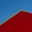

In [425]:
f = 'here.jpg'
img = Image.fromarray(subset, 'RGB')
img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
img.save(f, "JPEG") # resave the image back to the folder
row = imread(f) # load an image  # load it into numpy
row = np.expand_dims(row, axis=0)
img

In [426]:
row = row.astype('float32')
row = row / 255.0

In [427]:
code_to_target[np.argmax(model.predict(row))], max(model.predict(row)[0])

('stop_sign', 0.59590423)

In [428]:
def predict_window(x_coordinate, y_coordinate, window_size=128, resize_to=(32,32)):
    # will predict a category given a window of an image
    # returns a prediction, with a probability
    subset = image[y_coordinate:y_coordinate+window_size,x_coordinate:x_coordinate+window_size,]
    img = Image.fromarray(subset, 'RGB')
    img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
    f = 'here.jpg'
    img.save(f, "JPEG") # resave the image back to the folder
    row = imread(f) # load an image  # load it into numpy
    row = np.expand_dims(row, axis=0)
    imshow(img)
    row = row.astype('float32')
    row = row / 255.0
    proba = max(model.predict(row)[0])
    return code_to_target[np.argmax(model.predict(row))], proba

In [429]:
predict_window(350,50,400)  # I happen to know that this would work.

('stop_sign', 0.99999881)

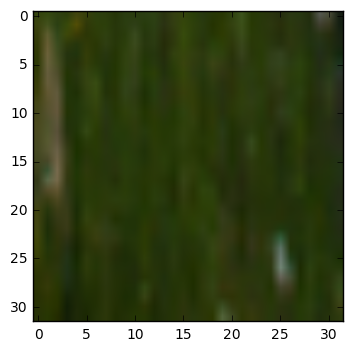

In [430]:
# try multiple different windwos of the image

window_size = 400
step = 50
threshold = .9999
found = []
for x in range(1,image.shape[0]-window_size, step):
    for y in range(1,image.shape[1]-window_size, step):
        try:
            prediction, proba = predict_window(x,y,window_size)
            if proba >= threshold:
                found.append((x, y, window_size, prediction, proba))
        except:
            pass

In [431]:
found  # show the objects found at a certain threshold

[(301, 51, 400, 'stop_sign', 0.99998033),
 (351, 51, 400, 'stop_sign', 0.99999881),
 (351, 101, 400, 'stop_sign', 0.99996924),
 (401, 51, 400, 'stop_sign', 0.99999595),
 (401, 101, 400, 'stop_sign', 0.99997997)]

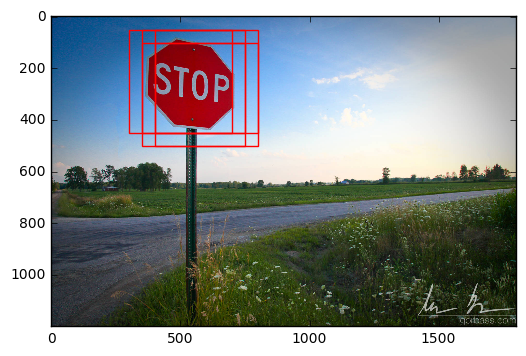

In [432]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
for f in found:
    rect = patches.Rectangle((f[0],f[1]),f[2],f[2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

# Add the patch to the Axes


plt.show()

In [465]:
def magic(url, window_size=200, step=50, threshold=.99):
    image = imread(url) # load an image
    image.shape
    found = []
    def predict_window(image, x_coordinate, y_coordinate, window_size=128, resize_to=(32,32)):
        subset = image[y_coordinate:y_coordinate+window_size,x_coordinate:x_coordinate+window_size,]
        img = Image.fromarray(subset, 'RGB')
        img = img.resize(size, Image.ANTIALIAS) # resize image to 32 by 32 for ease
        f = 'here.jpg'
        img.save(f, "JPEG") # resave the image back to the folder
        row = imread(f) # load an image  # load it into numpy
        row = np.expand_dims(row, axis=0)
        row = row.astype('float32')
        row = row / 255.0
        proba = max(model.predict(row)[0])
        return code_to_target[np.argmax(model.predict(row))], proba
    for x in range(1,image.shape[0]-window_size, step):
        for y in range(1,image.shape[1]-window_size, step):
            try:
                prediction, proba = predict_window(image, x,y,window_size)
                if proba >= threshold:
                    found.append((x, y, window_size, prediction, proba))
            
            except Exception as e:
                pass
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)
    print found
    # Create a Rectangle patch
    for f in found:
        rect = patches.Rectangle((f[0],f[1]),f[2],f[2],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

    # Add the patch to the Axes


    plt.show()

[(301, 251, 300, 'accordion', 0.99890983)]


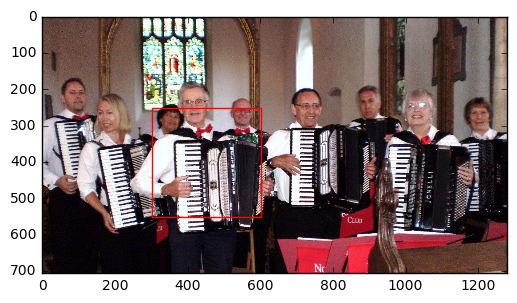

In [474]:
url = '../data/accordion_band.jpg'
magic(url=url, window_size=300, step=50, threshold=.998)

[(301, 51, 400, 'stop_sign', 0.99998033), (301, 101, 400, 'stop_sign', 0.99924433), (351, 51, 400, 'stop_sign', 0.99999881), (351, 101, 400, 'stop_sign', 0.99996924), (351, 151, 400, 'stop_sign', 0.9986456), (401, 1, 400, 'stop_sign', 0.99879777), (401, 51, 400, 'stop_sign', 0.99999595), (401, 101, 400, 'stop_sign', 0.99997997), (401, 151, 400, 'stop_sign', 0.99860889), (451, 51, 400, 'stop_sign', 0.9996767), (451, 101, 400, 'stop_sign', 0.99978501)]


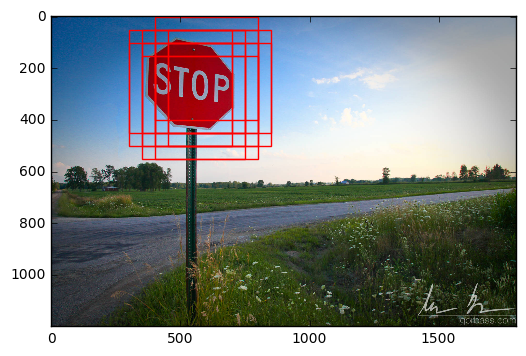

In [475]:
url = '../data/stop.jpg'
magic(url, window_size=400, step=50, threshold=.998)

[(301, 651, 350, 'Motorbikes', 0.99549472)]


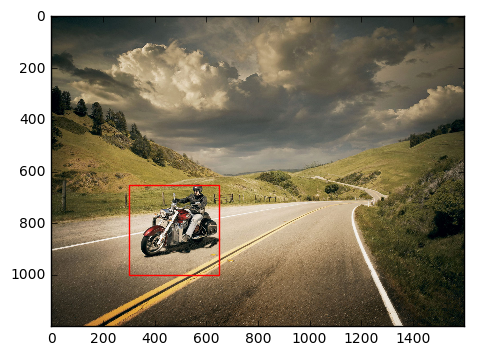

In [485]:
url = '../data/motor.jpg'
magic(url, window_size=350, step=50, threshold=.995)